In [1]:
!pip3 install opencv-python


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


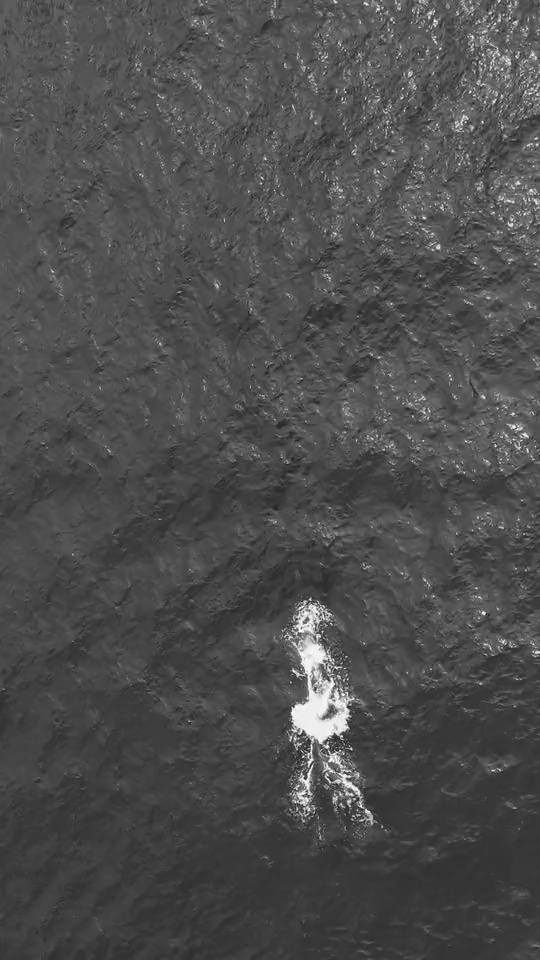

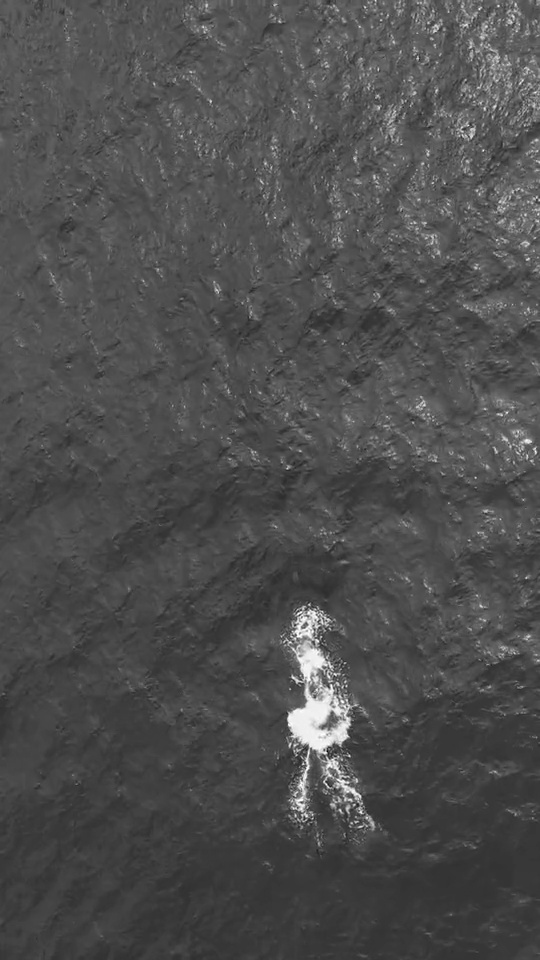

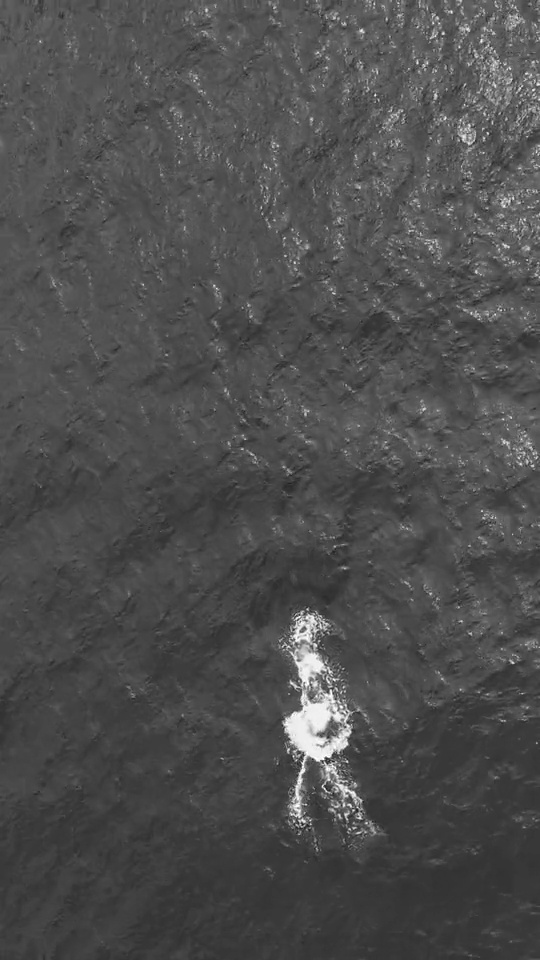

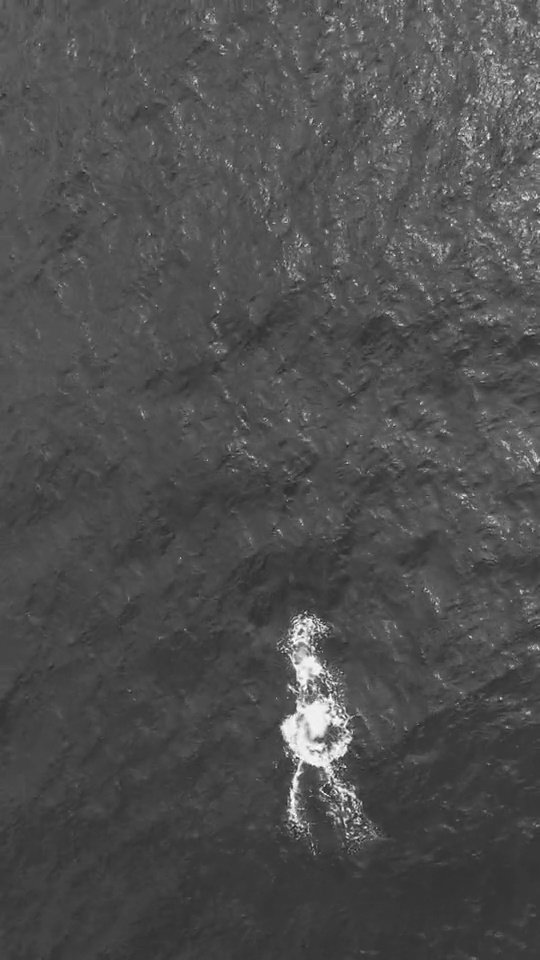

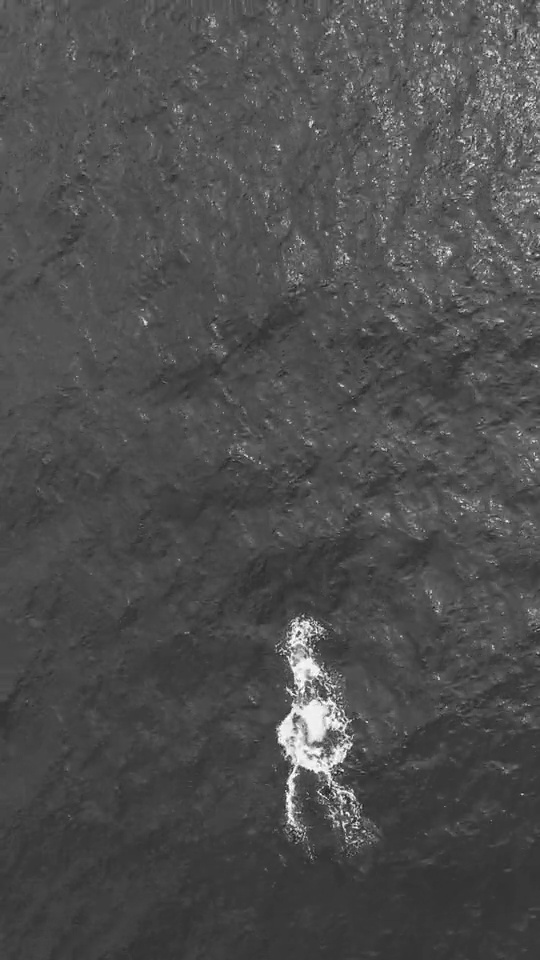

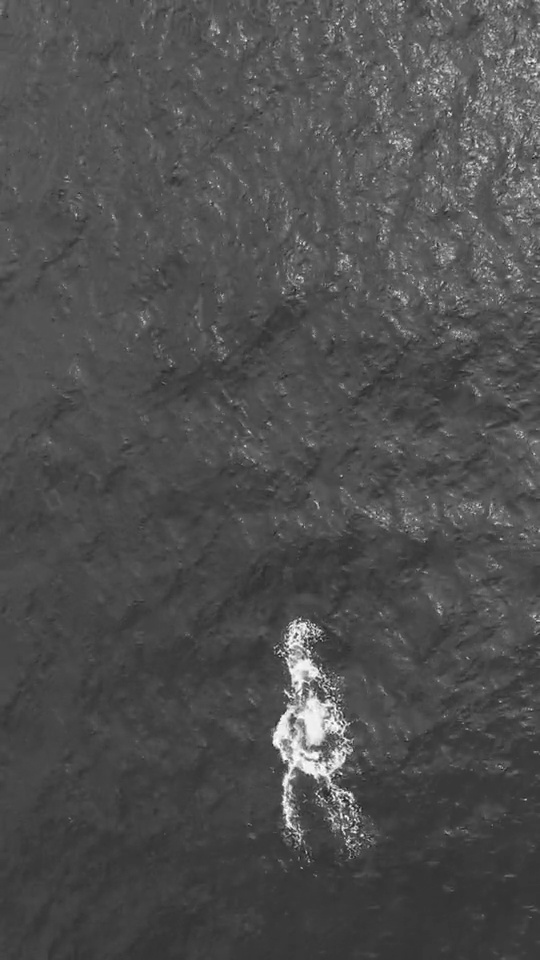

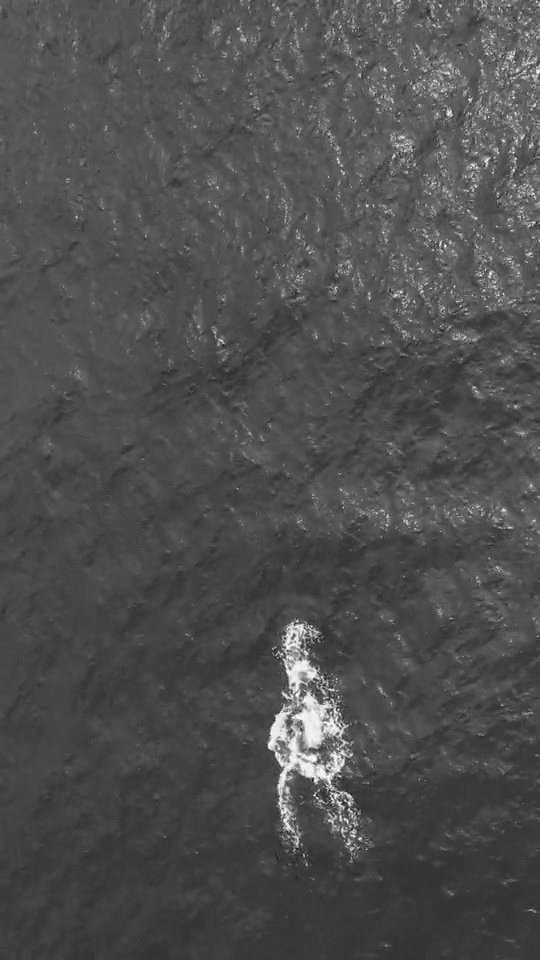

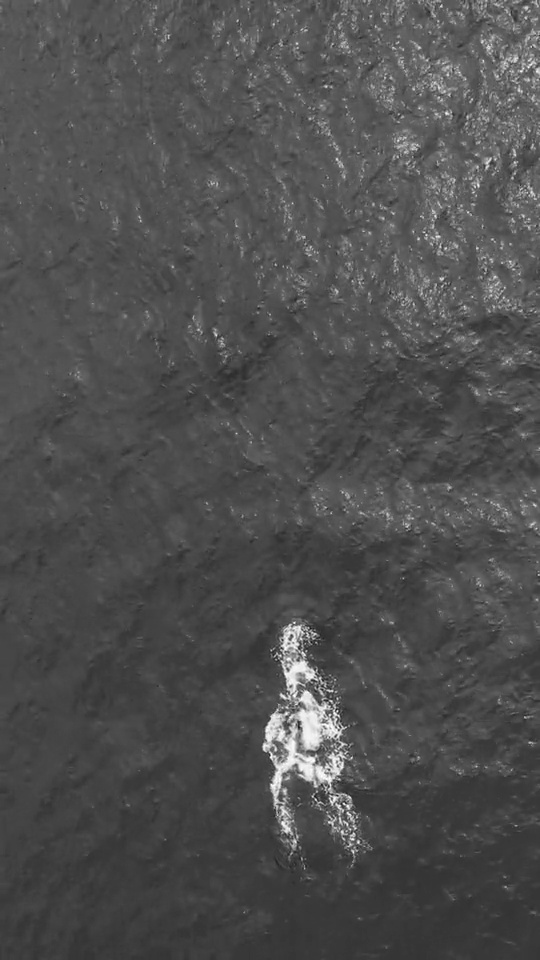

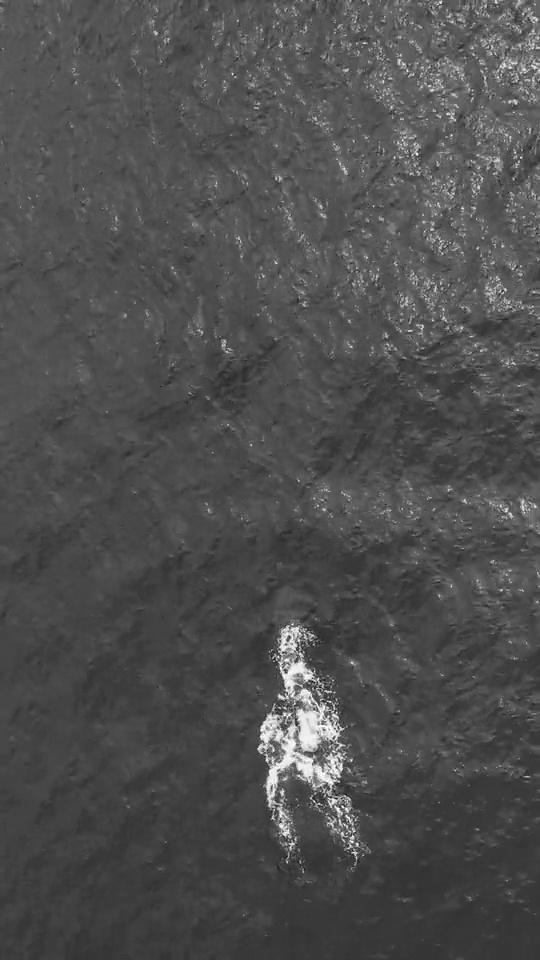

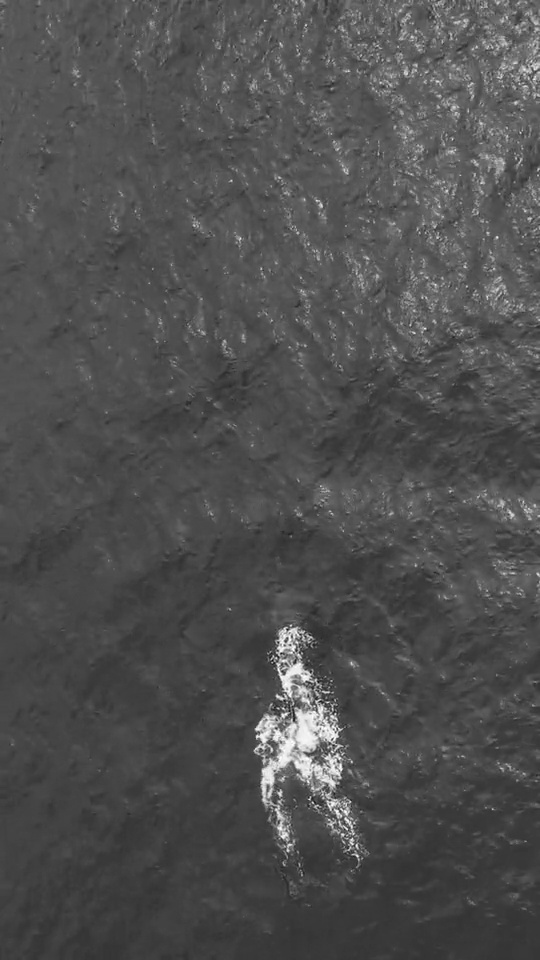

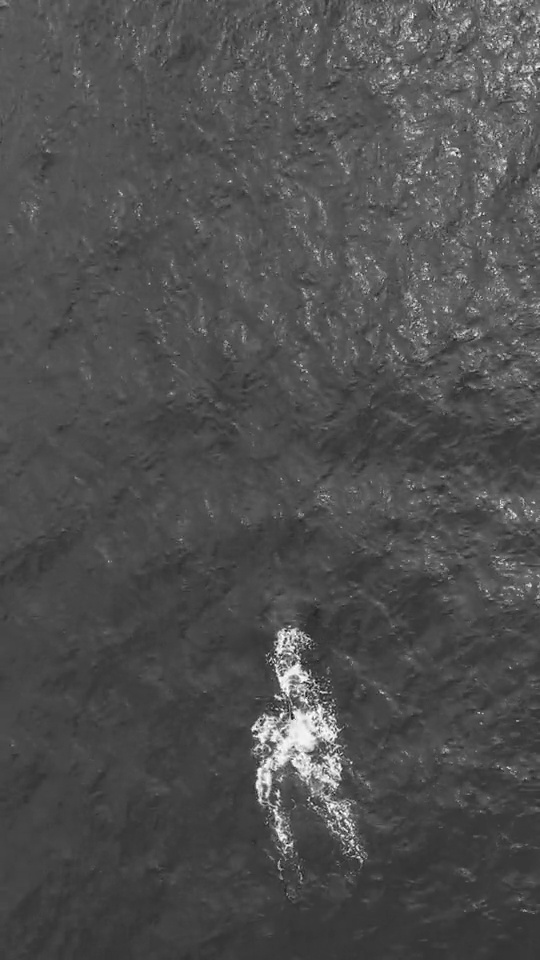

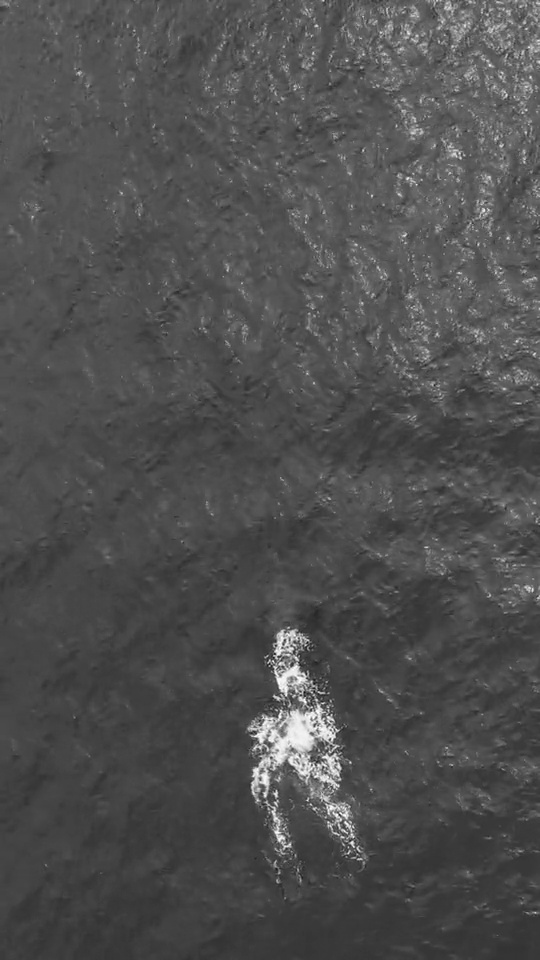

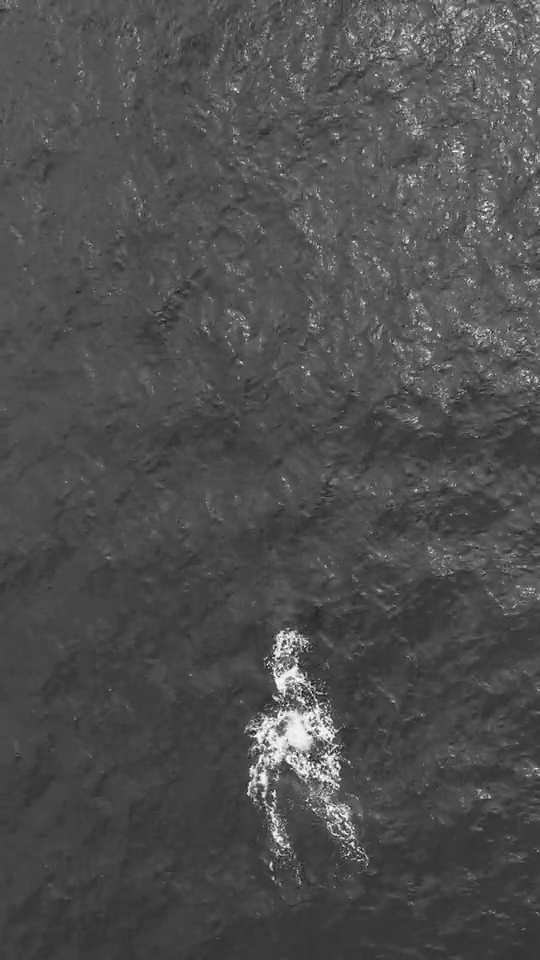

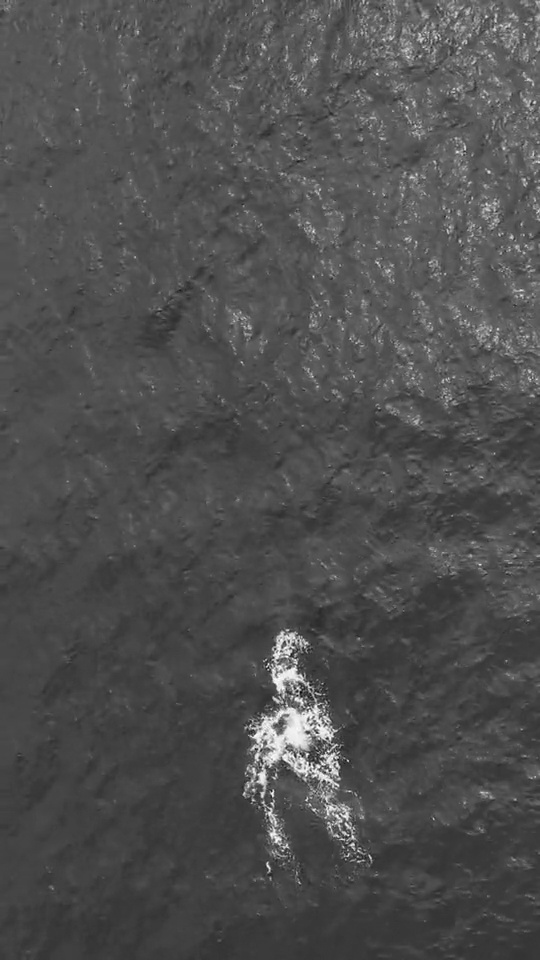

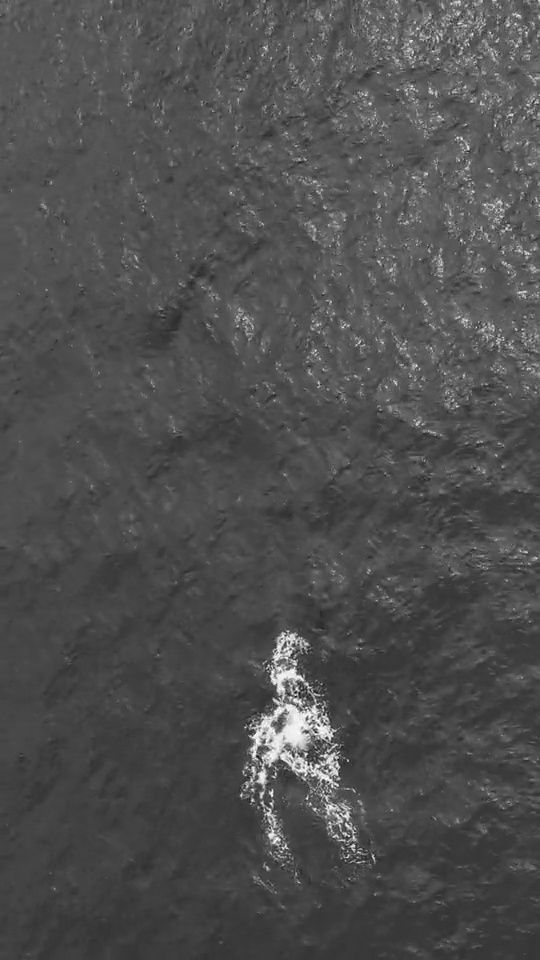

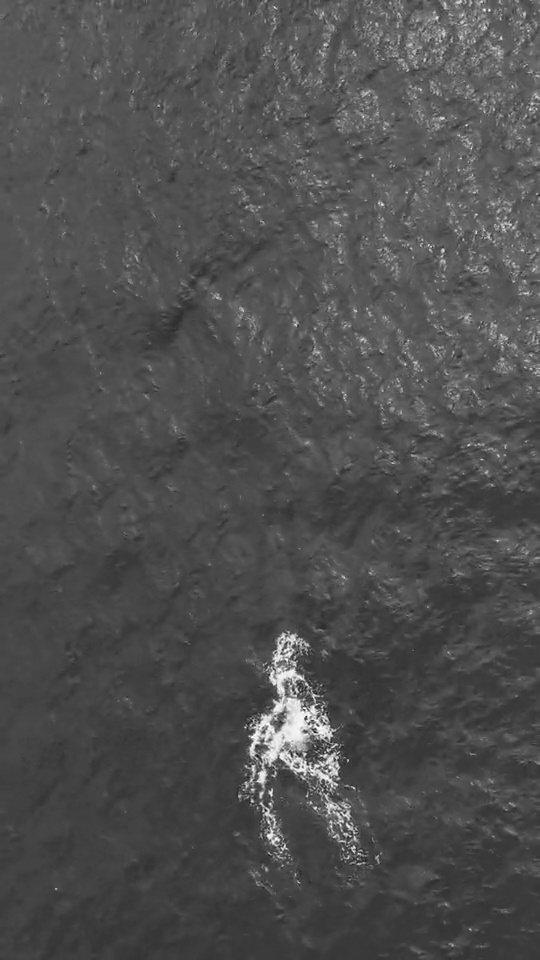

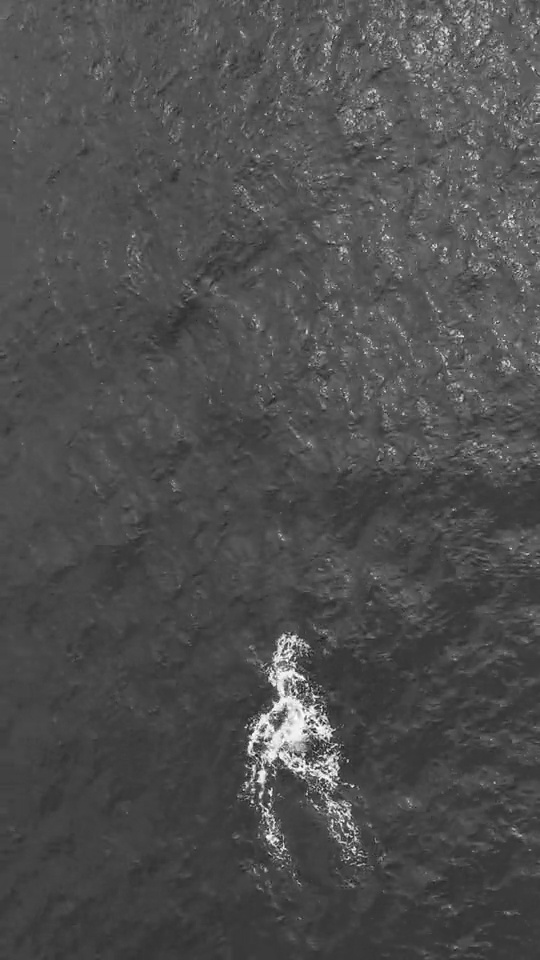

In [3]:
import cv2
import os
from IPython.display import display, Image

def process_frame(frame, frame_number):
    """
    Пример обработки кадра. Можно добавить сюда любую обработку, например:
    распознавание объектов, применение фильтров и т.д.
    """
    # Конвертируем кадр в оттенки серого
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Сохраняем обработанный кадр
    frame_filename = f"processed_frame_{frame_number}.jpg"
    cv2.imwrite(frame_filename, gray_frame)
    return frame_filename

def display_frame(frame_filename):
    """
    Отображает сохранённый кадр.
    """
    with open(frame_filename, "rb") as file:
        display(Image(data=file.read()))

def process_video(video_source, process_percentage=30):
    """
    Читает видеофайл или поток с камеры, обрабатывает его по кадрам и выводит результат.
    """
    cap = cv2.VideoCapture(video_source)

    if not cap.isOpened():
        print("Не удалось открыть видеоисточник")
        return

    # Получаем общее количество кадров
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    step = max(1, int(total_frames / (total_frames * process_percentage / 100)))

    frame_number = 0
    try:
        while True:
            if frame_number < 1500:
                frame_number += 1
                continue
            ret, frame = cap.read()
            if not ret:
                print("Конец видео или ошибка чтения.")
                break

            # Пропускаем кадры согласно шагу
            if frame_number % step == 0:
                processed_frame_filename = process_frame(frame, frame_number)
                display_frame(processed_frame_filename)
                os.remove(processed_frame_filename)

            frame_number += 1
            if frame_number == 1550:
                break
    finally:
        cap.release()
        cv2.destroyAllWindows()

# video_source = 0  # Камера
video_source = "../../data/example_video.mp4"  # Пример видео файла

process_video(video_source, process_percentage=30)



In [4]:


import cv2
import os
import numpy as np
from IPython.display import display, Image

def process_frame(frame, frame_number):
    """
    Пример обработки кадра. Можно добавить сюда любую обработку, например:
    распознавание объектов, применение фильтров и т.д.
    """
    # Добавляем фильтр размытия
    blurred_frame = cv2.GaussianBlur(frame, (15, 15), 0)
    # Добавляем рамку к кадру
    bordered_frame = cv2.copyMakeBorder(blurred_frame, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=[0, 255, 0])
    # Сохраняем обработанный кадр
    frame_filename = f"processed_frame_{frame_number}.jpg"
    cv2.imwrite(frame_filename, bordered_frame)
    return frame_filename

def display_frame(frame_filename):
    """
    Отображает сохранённый кадр в Jupyter Notebook.
    """
    with open(frame_filename, "rb") as file:
        display(Image(data=file.read()))

def process_video(video_source):
    """
    Читает видеофайл или поток с камеры, обрабатывает его по кадрам и выводит результат в Jupyter Notebook.
    """
    cap = cv2.VideoCapture(video_source)

    if not cap.isOpened():
        print("Не удалось открыть видеоисточник")
        return

    frame_number = 0
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Конец видео или ошибка чтения.")
                break

            # Обрабатываем кадр
            processed_frame_filename = process_frame(frame, frame_number)

            # Отображаем обработанный кадр
            display_frame(processed_frame_filename)

            # Удаляем временный файл
            os.remove(processed_frame_filename)

            frame_number += 1
    finally:
        cap.release()
        cv2.destroyAllWindows()

# Укажите путь к видеофайлу или замените на 0 для использования веб-камеры
video_source = 0  # Камера
# video_source = "example_video.mp4"  # Видео файл

process_video(video_source)

[12/23 16:51:04.672260][info][10859866][Context.cpp:69] Context created with config: default config!
[12/23 16:51:04.672278][info][10859866][Context.cpp:74] Context work_dir=/Users/alfa/PycharmProjects/whales-identification/research/notebooks
[12/23 16:51:04.672279][info][10859866][Context.cpp:77] 	- SDK version: 1.9.4
[12/23 16:51:04.672280][info][10859866][Context.cpp:78] 	- SDK stage version: main
[12/23 16:51:04.672282][info][10859866][Context.cpp:82] get config EnumerateNetDevice:false
[12/23 16:51:04.672286][info][10859866][MacPal.cpp:36] createObPal: create MacPal!
[12/23 16:51:04.673316][info][10859866][MacPal.cpp:104] Create PollingDeviceWatcher!
[12/23 16:51:04.673324][info][10859866][DeviceManager.cpp:15] Current found device(s): (0)
[12/23 16:51:04.673326][info][10859866][Pipeline.cpp:15] Try to create pipeline with default device.
[12/23 16:51:04.673328][warning][10859866][ObException.cpp:5] No device found, fail to create pipeline!
[12/23 16:51:04.674536][info][10859866][

OpenCV: camera access has been denied. Either run 'tccutil reset Camera' command in same terminal to reset application authorization status, either modify 'System Preferences -> Security & Privacy -> Camera' settings for your application.
OpenCV: camera failed to properly initialize!
[ WARN:0@20.698] global cap.cpp:323 open VIDEOIO(OBSENSOR): raised unknown C++ exception!


